In [1]:
import zipfile
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pydot
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from PIL import Image

with zipfile.ZipFile('./trafficsigns_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

# Data handling

In [2]:
#data = pd.read_csv('./CIFAR_Data.csv')
dir_list = os.listdir('./trafficsigns_dataset')
dir_list.remove('.DS_Store')
dir_list.remove('Readme.txt')

print(dir_list)
path='./trafficsigns_dataset/'
arr=[]

counter1=1
counter2=1


for i in dir_list:
    dir_listtemp=os.listdir(path+i)
    if '.DS_Store'in dir_listtemp:
        dir_listtemp.remove('.DS_Store')

    for j in dir_listtemp:
        dir_listtemp2=os.listdir(path+i+'/'+j)

        for k in dir_listtemp2:
            arr.append((path+i+'/'+j+'/'+k, counter1, counter2))
        counter2+=1
    counter1+=1
    #counter2+=1

data = np.array(arr)
                #dtype=[("a", "str"), ("b", "i4"), ("c", "i4")])
df = pd.DataFrame(data, columns=['Image', 'Form', 'Type'])
df['Form'] = df['Form'].astype(int)
df['Type'] = df['Type'].astype(int)

df.to_csv('trafficsigns_data.csv',index=True, index_label='ID' )        
            
 




['diamond', 'hex', 'round', 'square', 'triangle']


In [3]:
#Datasplit

train, val = train_test_split(df, test_size=0.30, random_state=48)
print(df.shape)
print(train.shape)
print(val.shape)

(3700, 3)
(2590, 3)
(1110, 3)


# EDA

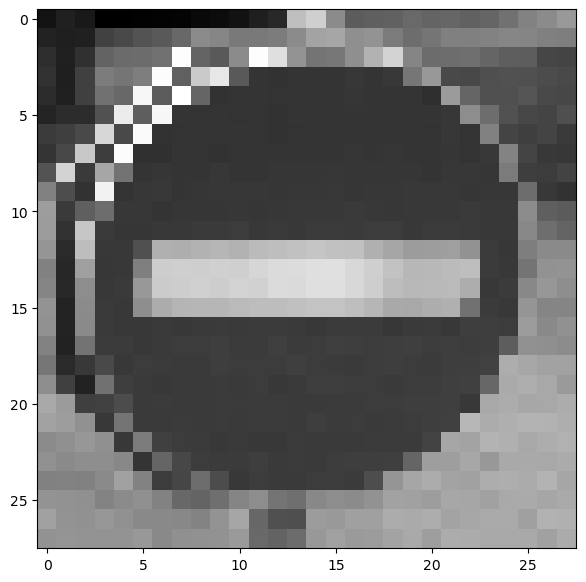

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,34,47,40,16,16,18,19,20,25,28,33,45,54,195,210,146,102,105,107,115,110,112,108,111,122,138,146,159
1,48,45,47,77,86,94,100,114,146,142,130,129,132,146,169,171,150,154,131,118,126,136,136,138,142,141,136,134
2,59,46,62,109,116,117,123,253,110,100,146,253,225,155,125,128,150,183,214,141,117,118,120,111,104,103,82,80
3,63,45,76,132,126,134,252,106,205,232,100,66,63,66,66,66,68,66,69,127,158,86,84,90,93,91,87,86
4,58,46,76,123,114,247,102,255,111,63,64,65,64,65,65,65,67,65,65,66,60,161,111,91,91,96,86,83
5,50,58,58,93,237,104,247,66,64,65,64,64,63,66,66,66,66,66,66,65,65,68,148,118,93,83,80,90
6,72,75,86,217,86,250,63,64,64,65,65,64,63,64,66,65,66,66,65,66,64,68,64,137,80,75,80,71
7,66,84,203,73,252,62,61,65,64,63,65,66,65,65,66,66,67,65,67,66,65,67,64,69,140,80,70,68
8,94,214,71,171,124,65,67,65,66,68,66,66,67,67,67,68,67,67,67,67,66,68,68,67,131,74,73,79
9,137,88,63,242,64,68,69,65,67,68,68,68,67,68,68,69,67,68,68,69,69,69,67,68,68,118,70,63


In [4]:
plt.figure(figsize=[7, 7])
plt.imshow(Image.open(df['Image'][750]), cmap='gray')
#plt.title('Digit: %i; Resolution (pixels): %dx%d' % (df3['Image'][10], *df3['Image'][10].size()), fontsize=20)
plt.show()
#What the computer "sees",  pixel values indicate color (0=white to 255=black)
with pd.option_context('display.max_rows', 100, 'display.max_columns', 500):
    display(pd.DataFrame(np.asarray(Image.open(df['Image'][750]))))

In [5]:
train.describe()

,Form,Type
count,2590.000000,2590.000000
mean,3.524710,9.357529
std,1.113476,5.077420
min,1.000000,1.000000
25%,3.000000,5.000000
50%,3.000000,9.000000
75%,4.000000,14.000000
max,5.000000,16.000000


[202, 31, 1208, 504, 645]
[202, 31, 198, 88, 270, 152, 75, 208, 133, 84, 148, 71, 84, 201, 168, 477]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'rightofway'),
  Text(1, 0, 'stop'),
  Text(2, 0, 'bicycle'),
  Text(3, 0, 'limitedtraffic'),
  Text(4, 0, 'noentry'),
  Text(5, 0, 'noparking'),
  Text(6, 0, 'roundabout'),
  Text(7, 0, 'speed'),
  Text(8, 0, 'trafficdirective'),
  Text(9, 0, 'traveldirection'),
  Text(10, 0, 'continue'),
  Text(11, 0, 'crossing'),
  Text(12, 0, 'laneend'),
  Text(13, 0, 'parking'),
  Text(14, 0, 'giveway'),
  Text(15, 0, 'warning')])

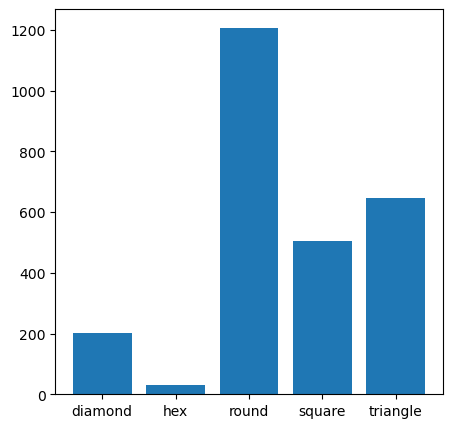

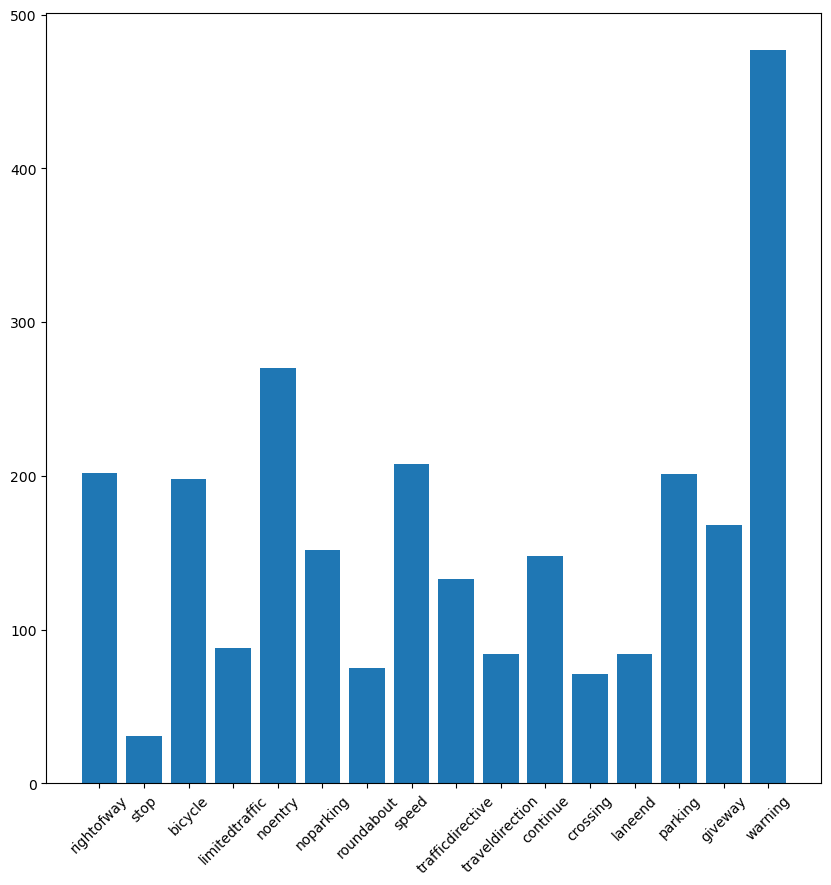

In [6]:
arrForm=[]
npType=train['Form'].to_numpy()
for i in range(int(npType[-1])):
    a=np.count_nonzero(npType==i+1)
    arrForm.append(a)
print(arrForm)

arrType=[]
npType=train['Type'].to_numpy()
for i in range(int(npType[-1])):
    a=np.count_nonzero(npType==i+1)
    arrType.append(a)
print(arrType)
Forms=['diamond', 'hex', 'round', 'square', 'triangle']
Types=['rightofway', 'stop', 'bicycle', 'limitedtraffic', 'noentry', 
              'noparking', 'roundabout', 'speed', 'trafficdirective', 
              'traveldirection', 'continue', 'crossing', 'laneend', 'parking', 
              'giveway', 'warning']

plt.figure(figsize=(5,5))
plt.bar(Forms, arrForm)

plt.figure(figsize=(10,10))
plt.bar(Types, arrType)
plt.xticks(rotation=45)

[80, 12, 552, 184, 282]
16
[80, 12, 87, 37, 105, 90, 23, 108, 62, 40, 51, 24, 34, 75, 63, 219]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'rightofway'),
  Text(1, 0, 'stop'),
  Text(2, 0, 'bicycle'),
  Text(3, 0, 'limitedtraffic'),
  Text(4, 0, 'noentry'),
  Text(5, 0, 'noparking'),
  Text(6, 0, 'roundabout'),
  Text(7, 0, 'speed'),
  Text(8, 0, 'trafficdirective'),
  Text(9, 0, 'traveldirection'),
  Text(10, 0, 'continue'),
  Text(11, 0, 'crossing'),
  Text(12, 0, 'laneend'),
  Text(13, 0, 'parking'),
  Text(14, 0, 'giveway'),
  Text(15, 0, 'warning')])

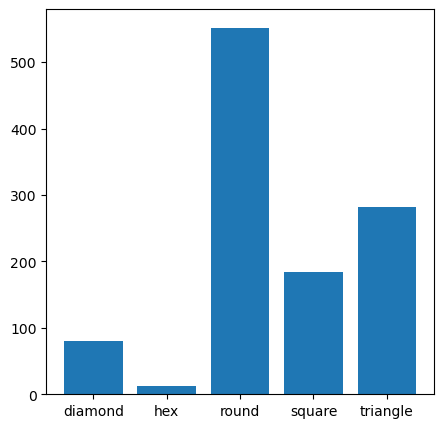

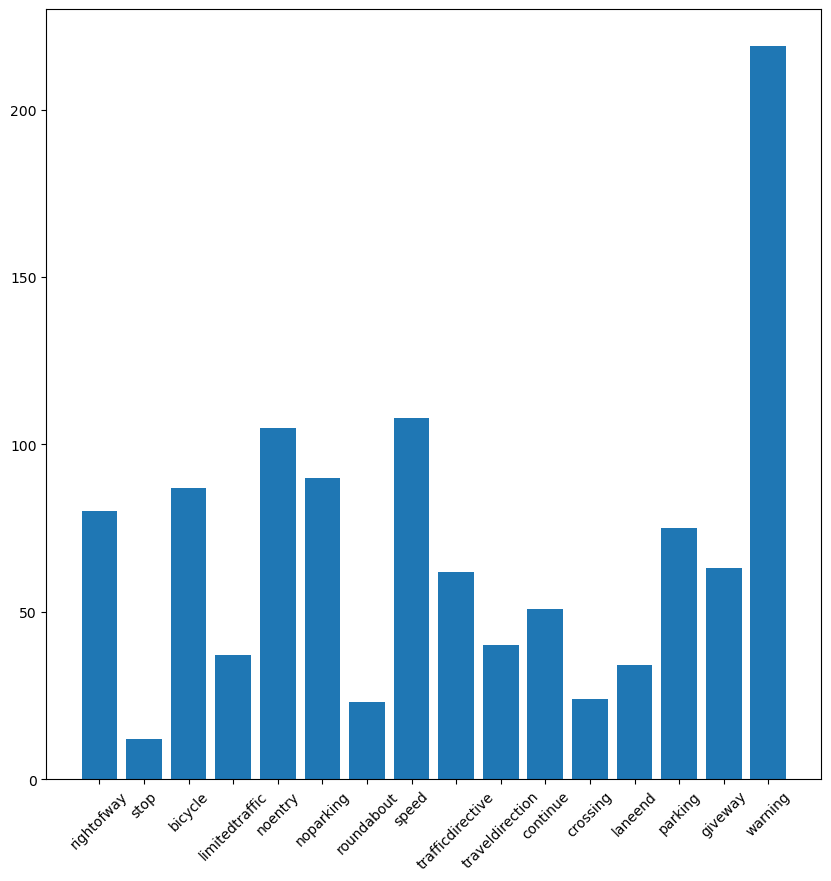

In [7]:
arrFormVal=[]
npType=val['Form'].to_numpy()
for i in range(int(npType[-1])):
    a=np.count_nonzero(npType==i+1)
    arrFormVal.append(a)
print(arrFormVal)

arrTypeVal=[]
npType=val['Type'].to_numpy()
print(npType[-1])
for i in range(int(npType[-1])):
    a=np.count_nonzero(npType==i+1)
    arrTypeVal.append(a)
print(arrTypeVal)

plt.figure(figsize=(5,5))
plt.bar(Forms, arrFormVal)

plt.figure(figsize=(10,10))
plt.bar(Types, arrTypeVal)
plt.xticks(rotation=45)

<BarContainer object of 5 artists>

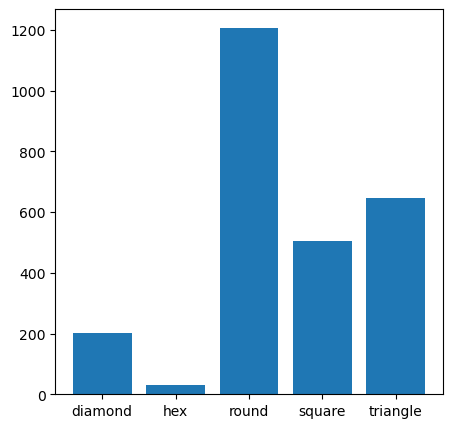

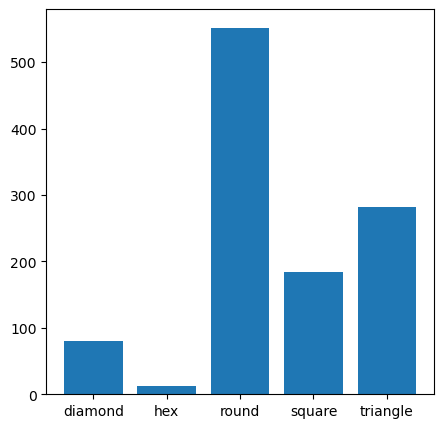

In [8]:
plt.figure(figsize=(5,5))
plt.bar(Forms, arrForm)
plt.figure(figsize=(5,5))
plt.bar(Forms, arrFormVal)



(202,)
[202]
(31,)
[31]
(1208,)
[198, 88, 270, 152, 75, 208, 133, 84]
(504,)
[148, 71, 84, 201]
(645,)
[168, 477]


([0, 1], [Text(0, 0, 'giveway'), Text(1, 0, 'warning')])

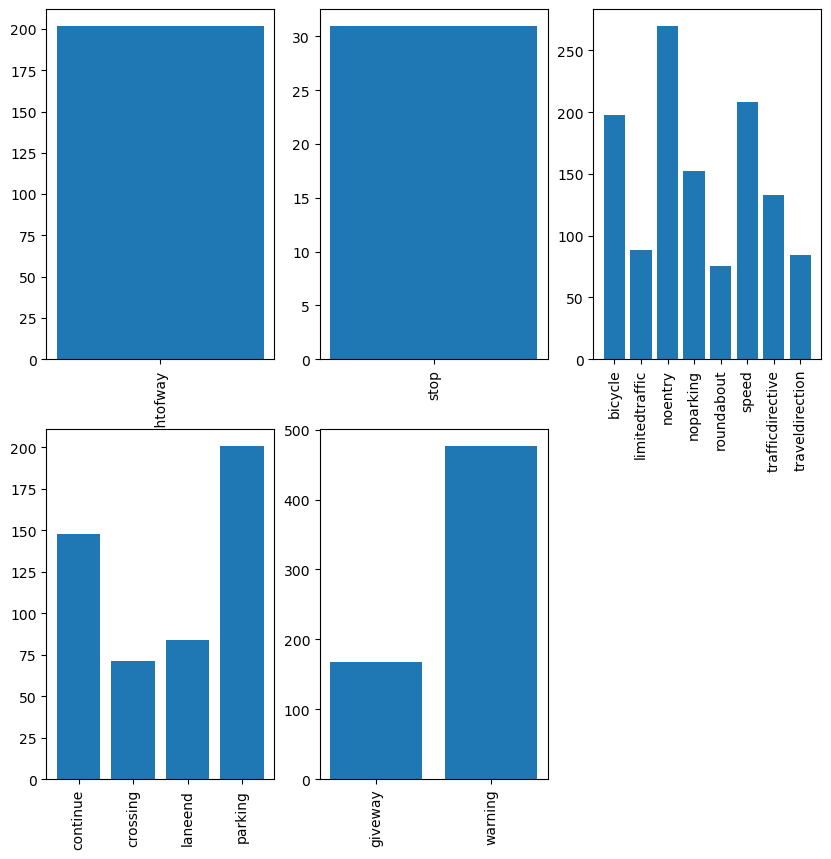

In [9]:
plt.figure(figsize=(10,10))
a = train[train["Form"]==1]

arrType=[]
npType=a['Type'].to_numpy()
print(npType.shape)
for i in range(1,2):
    b=np.count_nonzero(npType==i)
    arrType.append(b)

print(arrType)
plt.subplot(2,3,1)
plt.bar(Types[0:1], arrType)
plt.xticks(rotation=90)

a = train[train["Form"]==2]

arrType=[]
npType=a['Type'].to_numpy()
print(npType.shape)
for i in range(2,3):
    b=np.count_nonzero(npType==i)
    arrType.append(b)

print(arrType)
plt.subplot(2,3,2)
plt.bar(Types[1:2], arrType)
plt.xticks(rotation=90)

a = train[train["Form"]==3]

arrType=[]
npType=a['Type'].to_numpy()
print(npType.shape)
for i in range(3,11):
    b=np.count_nonzero(npType==i)
    arrType.append(b)

print(arrType)
plt.subplot(2,3,3)
plt.bar(Types[2:10], arrType)
plt.xticks(rotation=90)

a = train[train["Form"]==4]

arrType=[]
npType=a['Type'].to_numpy()
print(npType.shape)
for i in range(11,15):
    b=np.count_nonzero(npType==i)
    arrType.append(b)

print(arrType)
plt.subplot(2,3,4)
plt.bar(Types[10:14], arrType)
plt.xticks(rotation=90)

a = train[train["Form"]==5]

arrType=[]
npType=a['Type'].to_numpy()
print(npType.shape)
for i in range(15,17):
    b=np.count_nonzero(npType==i)
    arrType.append(b)

print(arrType)
plt.subplot(2,3,5)
plt.bar(Types[14:], arrType)
plt.xticks(rotation=90)


# Model developement
 - In multiclass classification, a natural measure of performance is the accurace, which is the chosen performence metric for these models
 - Due to label imbalance (EDA), the accuracy may not be as valuable on its own. Therefore, the F1 score will be used together with the accuracy(Kilde: https://www.kaggle.com/code/nkitgupta/evaluation-metrics-for-multi-class-classification). 
 - We set our goal to an accuracy of 80%
 - For a traditional NN, an accuracy of 50% is more realistic (Kilde: lab 6)
        

### Performance metric 

In [10]:
def get_f1_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_f1 = f1_score(train_y, train_pred, average='macro')
    val_f1 = f1_score(val_y, val_pred, average='macro')
    
    return train_f1, val_f1

In [11]:
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

### Baseline model 1

In [12]:
#Preparing the dataset for model 1: input image, output 
train_1 = train.drop(['Type'], axis=1)
val_1 = val.drop(['Type'], axis=1)

train_1.head(4)

,Image,Form
1265,./trafficsigns_dataset/round/noparking/01435_0...,3
1319,./trafficsigns_dataset/round/noparking/01737_0...,3
3268,./trafficsigns_dataset/triangle/warning/00573_...,5
3257,./trafficsigns_dataset/triangle/warning/00468_...,5


In [13]:
INPUT_DIMENSION = (28,28,3)
HIDDEN_LAYER_DIMENSION = 256
OUTPUT_CLASSES = 5


base_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIMENSION),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIMENSION, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

base_model.summary()

C:\Users\anyone\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 2352)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         602,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 603,653 (2.30 MB)

 Trainable params: 603,653 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:

#tf.keras.utils.plot_model(base_model, show_shapes=True)

In [15]:
base_model.compile(optimizer='SGD', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                   metrics=['f1_score','categorical_accuracy'])

In [16]:

#Dataframe labels to string:
train_1['Form'] = train_1['Form'].astype('str')
val_1['Form'] = val_1['Form'].astype('str')

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_1,
        directory='./',
        x_col="Image",
        y_col="Form",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_1,
        directory='./',
        x_col="Image",
        y_col="Form",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

class_weights={0:5.98, 1:38.97,2:1,3:2.4,4:1.87}
#38.97

Found 2590 validated image filenames belonging to 5 classes.
Found 1109 validated image filenames belonging to 5 classes.


C:\Users\anyone\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  warnings.warn(


In [18]:

model_history = base_model.fit(train_generator, validation_data=validation_generator, epochs=50, verbose=0, class_weight=None)

C:\Users\anyone\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Train: 
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - categorical_accuracy: 0.9266 - f1_score: 0.7557 - loss: 0.2899
Validation: 
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - categorical_accuracy: 0.9253 - f1_score: 0.7343 - loss: 0.3056


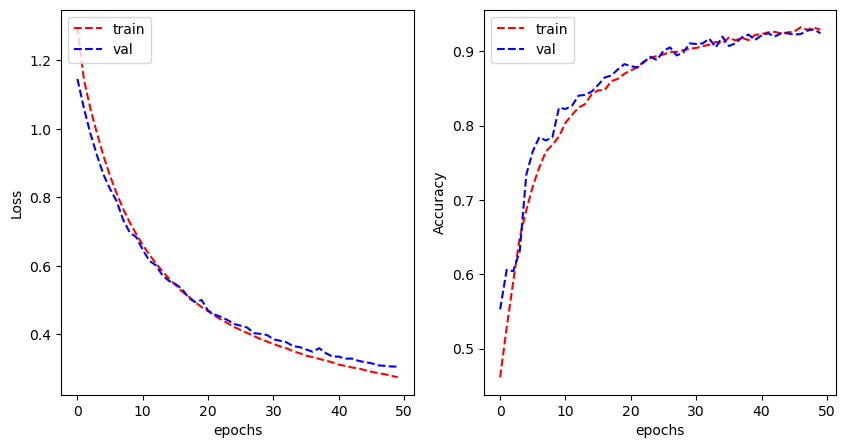

In [26]:
'''
#def f1_score():
val_predictions = base_model.predict(validation_generator)
val_pred_classes = np.argmax(val_predictions, axis=1)
val_true_classes = validation_generator.classes
f1 = f1_score(val_true_classes, val_pred_classes, average=None)

train_predictions = base_model.predict(train_generator)
train_pred_classes = np.argmax(train_predictions, axis=1)
train_true_classes = train_generator.classes
f1_train = f1_score(train_true_classes, train_pred_classes, average=None)

print("F1 score:", f1)
print("F1 score train:", f1_train)


f1_macro_val = f1_score(val_true_classes, val_pred_classes, average='macro')
f1_macro_train = f1_score(train_true_classes, train_pred_classes, average='macro')

print("F1 macro score val:", f1_macro_val)
print("F1 macro score train:", f1_macro_train)
'''



print('Train: ')
base_model.evaluate(train_generator)
print('Validation: ')
base_model.evaluate(validation_generator)

plot_learning_curve(model_history.history['loss'], model_history.history['val_loss'], 
                    model_history.history['categorical_accuracy'], model_history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')


### Incremental changes

In [20]:
INPUT_DIMENSION = (28,28,3)
HIDDEN_LAYER_DIMENSION = 256
OUTPUT_CLASSES = 5


imp_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIMENSION),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIMENSION, activation='relu'),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIMENSION, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
    
])

imp_model.summary()

C:\Users\anyone\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 2352)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         602,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,445 (2.55 MB)

 Trainable params: 669,445 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
imp_model.compile(optimizer='SGD', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                   metrics=['categorical_accuracy','f1_score'])

In [22]:
imp_model_history = imp_model.fit(train_generator, validation_data=validation_generator, epochs=50, verbose=0, class_weight=class_weights)

In [30]:
'''
#def f1_score():
val_predictions = imp_model.predict(validation_generator)
val_pred_classes = np.argmax(val_predictions, axis=1)
val_true_classes = validation_generator.classes
f1 = f1_score(val_true_classes, val_pred_classes, average=None)

train_predictions = imp_model.predict(train_generator)
train_pred_classes = np.argmax(train_predictions, axis=1)
train_true_classes = train_generator.classes
f1_train = f1_score(train_true_classes, train_pred_classes, average=None)

f1_macro_val = f1_score(val_true_classes, val_pred_classes, average='macro')
f1_macro_train = f1_score(train_true_classes, train_pred_classes, average='macro')

print("Val - F1 score:", f1)
print("Train - F1 score:", f1_train)

print("Val - F1_macro score:", f1_macro_val)
print("Train - F1_macro score:", f1_macro_train)



y_true=[]
for i in train['Form'].to_numpy():
    b=[0,0,0,0,0]
    b[i-1]=1
    y_true.append(b)


metric = tf.keras.metrics.F1Score(average=None, threshold=None, name='f1_score', dtype=None)
#y_true = train['Form'].to_numpy()
y_pred = train_predictions

metric.update_state(y_true, y_pred)

result = metric.result()

print(result)
'''
'''
#print(imp_model_history.history['f1_score'])
'''


"\n#print(imp_model_history.history['f1_score'])\n"

81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - categorical_accuracy: 0.9995 - f1_score: 0.9899 - loss: 0.0111
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - categorical_accuracy: 0.9785 - f1_score: 0.9733 - loss: 0.0803


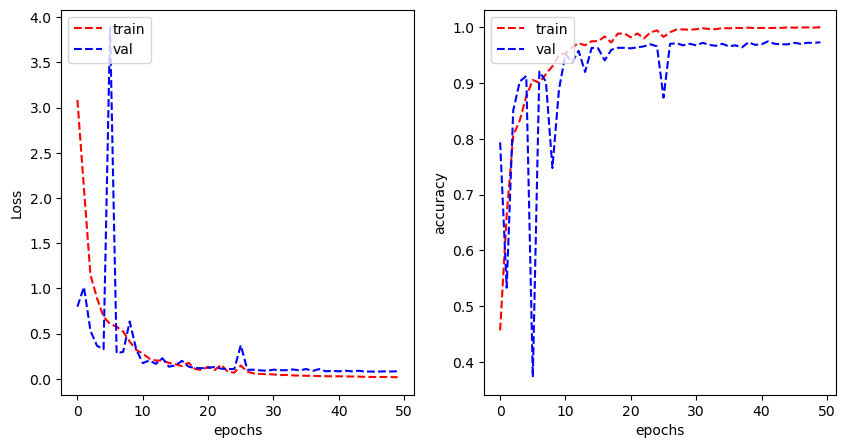

In [33]:
imp_model.evaluate(train_generator)
imp_model.evaluate(validation_generator)

plot_learning_curve(imp_model_history.history['loss'], imp_model_history.history['val_loss'], 
                    imp_model_history.history['categorical_accuracy'], imp_model_history.history['val_categorical_accuracy'], 
                    metric_name='accuracy')